<a href="https://colab.research.google.com/github/HUFS-Programming-2022/Junsu_202102707/blob/main/week_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# String with NLTK

In [31]:
import nltk
from nltk.book import *
nltk.download('book', quiet=True)

True

###내장함수

- string1.method(string2)
- list.method(string)

- list.count(string): string이 나타나는 개수
- str.replace(A, B): A -> B 변경
- str.strip(): 공백 등(\t도 포함) 제거
  - lstrip(), rstrip()
- find(str): 오프셋을 반환
  - lfind, rfind
  - 공백 포함
  - 1번째 값의 인덱스
  - 만족하는 값이 없을 경우 -1 반환
- index(str)
  - 만족하는 값이 없을 경우 error

In [ ]:
word = 'word'
word.replace('w', 'ch')
print(word)   #word자체가 변하지는 않음 -> 변화시키려면 새로 할당을 해야 함
word =  word.replace('w', 'ch')
print(word)

word
chord


In [ ]:
word.find('a')

-1

In [ ]:
word.index('a')

ValueError: ignored

###NLTK 내장함수
- list.method(variable)
- 자연어처리와 관련된 함수들

  - concordance('str'): 주어진 str의 앞뒤 문맥을 알려줌
  - similar('str'): 문맥이 비슷한 단어들
  - common_contexts(['str1', 'str2']): 주어진 str이 어떤 문맥을 공유하는지
  - dispersion_plot(['str1', 'str2'...]): 주어진 str이 문장에서 출현하는 위치를 이미지로
    - !pip install matplotlib 하고 나서 코드 돌리기

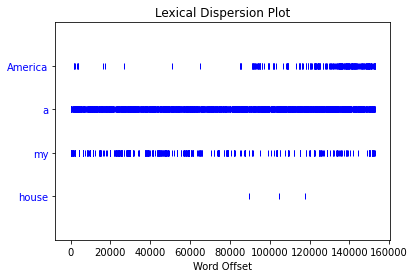

In [3]:
text4 = book.text4
!pip install matplotlib
text4.dispersion_plot(['America', 'a', 'my', 'house'])

### Frequency Distribution
- 단어의 빈도수를 활용할 수 있는 많은 메소드 제공
- 인간의 언어 -> 컴퓨터가 인식
  - 전체 단어 수
  - 특정 단어의 빈도수
- FreqDist(text1): 딕셔너리 자료형

In [ ]:
text1 = book.text1
fdist = nltk.FreqDist(text1)

- fdist.most_common(n): 가장 많이 나오는 단어 n개
- fdist['str']: 특정 단어의 빈도수
- fdist.freq('str'): 전체에서 단어가 차지하는 비율
- fdist.plot(n, cumulative = True): 젤 빈번한 것부터 50개 축적해서 그림 그리기
- fdist.hapaxes(): 1번 나타나는 단어들(중복 안 됨, 대소문자 구분)

In [ ]:
fdist.most_common(10) #가장 많이 나오는 단어 n개

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982)]

In [ ]:
fdist['whale'], text1.count('whale') #특정 단어의 빈도수

(906, 906)

In [ ]:
fdist.freq('whale') #전체에서 단어가 차지하는 비율

0.003473673313677301

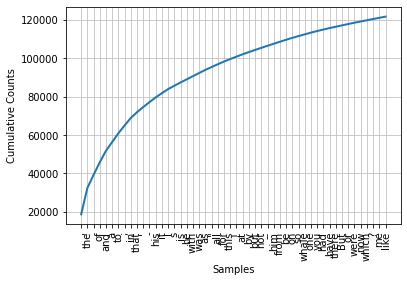

In [ ]:
fdist.plot(50, cumulative=True) #젤 빈번한 것부터 50개 축적해서 그림 그리기

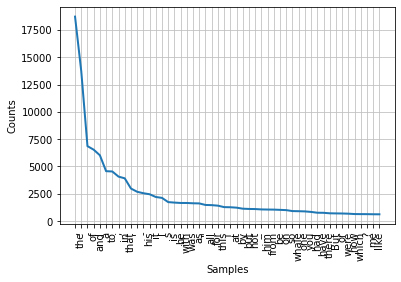

In [ ]:
fdist.plot(50, cumulative=False)  #축적X

In [ ]:
len(fdist.hapaxes())

9002

###리스트, 리스트 컴프리헨션
- 리스트: 배열, 리스트
- 하나의 변수에 여러 값을 할당하는 자료형
- 대괄호로 선언 [ ]
- 내부 요소들은 자료형이 달라도 됨
  - a = ['a', 1, True]
- 순서가 있음 -> 인덱싱, 슬라이싱 가능
- 빈 리스트 선언: list(), []

In [ ]:
drinks = ['rum', 'mojito', 'soju']
print(drinks[-1]) #drinks[-01]: X
drinks.index('soju')

soju


AttributeError: ignored

In [ ]:
drinks.find('soju')

AttributeError: ignored

### List Comprehension
- 지능형 리스트
- 주어진 리스트를 포함하는 새로운 리스트를 형성
- list + for_loop을 한 줄로 해결하는 방식
- [A for A' in B]
  - B에 있는 A'에서 A를 가진 리스트를 반환
  - B: 기존의 리스트
  - A': B의 자료형태
  - A: 새로운 리스트의 요소

-조건+: [A for A' in B if <조건식>], 
        [A for A' in B if <조건식> and <조건식>]

In [ ]:
#text1에서 알파벳 수가 10이상인 단어
over10 = [word for word in text1 if len(word) >= 10]
print(over10[:10])

['Consumptive', 'threadbare', 'handkerchief', 'embellished', 'signification', 'DICTIONARY', 'immediately', 'RICHARDSON', 'DICTIONARY', 'ERROMANGOAN']


In [ ]:
#text4에서 'gnt'를 포함하는 단어
gnt1 = [word for word in text4 if 'gnt' in word]
gnt2 = [word for word in text4 if word.find('gnt') > 0]
print(gnt1[:10])
print(gnt2[:10])

['sovereignty', 'sovereignty', 'sovereignty', 'sovereignty', 'sovereignty', 'sovereignty', 'sovereignty', 'sovereignty', 'sovereignty', 'sovereignties']
['sovereignty', 'sovereignty', 'sovereignty', 'sovereignty', 'sovereignty', 'sovereignty', 'sovereignty', 'sovereignty', 'sovereignty', 'sovereignties']


In [ ]:
a = [word.lower() for word in set(text4) if 'gnt' in word]
#the, The -> 연산
b = set([word.lower() for word in text4 if 'gnt' in word])
#연산 -> 중복 없앰
len(a), len(b)

(3, 2)

### 조건을 위한 함수: uncased, cased
- 'the' != 'The'
- upper(), lower()
- title(): 맨 앞글자를 대문자로
- capitalize(): title()과 동일
- swapcase(): 대문자를 소문자로, 소문자를 대문자로
- isuppper(): 대문자인지 물어봐서 True/False 반환
- islower(): 소문자인지 물어봐서 True/False 반환
- istitle(): 앞 글자가 대문자인지 물어봐서 True/False 반환
- endswith(): 무엇으로 끝나는지 물어봐서 True/False 반환
- startswith(): 무엇으로 시작하는지 물어봐서 True/False 반환
- isalpha(): 텍스트에서 알파벳만 골라내고 싶을 때

In [ ]:
#text1에서 'ableness'로 끝나는 단어 반환
[word for word in text1 if word.endswith('ableness')]

['uncomfortableness',
 'comfortableness',
 'intolerableness',
 'immutableness',
 'indomitableness',
 'reasonableness',
 'indispensableness',
 'indomitableness',
 'honourableness',
 'palpableness']

In [7]:
#text3에서 대문자로 시작하는 단어들 중에서 길이가 3 이상인 단어 중복없이 뽑고 대문자로 반환
'''
[word.upper() for word in set(text4) if word.istitle() and len(word) >= 3]
1. 거르기: god, God -> 걸러지지 않음
2. 결과 계산: GOD, GOD

set([word.upper() for word in text4 if word.istitle() and len(word) >= 3])
1. 계산: GOD, GOD
2. 거르기: GOD
'''
a = set([word.upper() for word in text4 if word.istitle() and len(word) >= 3])
print(list(a)[:10])

['WHY', 'GENERAL', 'SUCH', 'ENGINEERS', 'MISSOURI', 'COMMENDABLE', 'LOVE', 'PORTS', 'ORDER', 'FAREWELL']


In [13]:
#text4에서 알파벳인 단어 중, 길이가 4 이상이고, 빈도수가 5 이상인 단어의 길이 반환
fdist = nltk.FreqDist(text4)
a = [len(word) for word in text4 if word.isalpha() and len(word) >= 4 and fdist[word] >= 5]
print(a[:10])

[6, 8, 6, 5, 15, 12, 8, 4, 5, 5]


In [16]:
b = [len(word) for (word, count) in fdist.items() if word.isalpha() and len(word) >= 4 and count >= 5] #fdist로 바로 접근(fdist는 딕셔너리)
print(b[:10])

[6, 8, 6, 5, 15, 12, 8, 4, 5, 5]


###리스트, 스트링
- str.split(sep): str -> list
- sep.join(list): list -> str

In [20]:
sent = 'I, am, thirsty'
tokens = sent.split(',')
print(tokens)

#a에서 공백 없애기(리스트에서 변형된 리스트 만들기)
[word.strip() for word in tokens]

['I', ' am', ' thirsty']


['I', 'am', 'thirsty']

In [24]:
print(''.join(tokens))
print('-'.join(tokens))    #앞에 어떤 자료형이 오는지 기억하기

I am thirsty
I- am- thirsty


### 반복문
- [word for word in text]
- 자료구조를 순회할 때 사용함
- 정해진 동작을 반복적으로 수행할 때 내리는 명령어
- 시작조건, 종료조건, 수행명령으로 구성됨
- for 요소 in 반복범위:
    수행명령
- for, while
- 들여쓰기, 블록 -> 논리구조
- 무한루프가 되지 않도록 주의


In [28]:
import nltk
nltk.download('book', quiet = True)
from nltk import book

In [32]:
import nltk
from nltk.book import *
nltk.download('book', quiet=True)

True

In [33]:
#[word for word in text1]
for word in text1[:10]:
  print(word)   #print만 한 것

[
Moby
Dick
by
Herman
Melville
1851
]
ETYMOLOGY
.


In [37]:
[word for word in text1[:10]]   #위의 것을 리스트에 담아서 반환

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [40]:
#숫자 반복: range(start, end, step)
for i in range(4, 10, 2):
  print(i)

4
6
8


In [41]:
#text1-9 각 텍스트의 단어 수 반환
texts = [text1, text2, text3, text4, text5, text6, text7, text8, text9]
for i in texts:
  print(len(i))

260819
141576
44764
152901
45010
16967
100676
4867
69213


### 출력 포매팅
- 1. f'str...{var}'
  - f, F 둘 다 가능
- 2. %
  - 'str...%s' %var
- 3. 'str...{}'.format()

In [44]:
name = 'lee'
age = 20
print('my name is {1}, and I am {0} years old.'.format(age, name)) #{}안에 default는 순서대로
print(f'my name is {name}, and I am {age} years old.')

my name is lee, and I am 20 years old.
my name is lee, and I am 20 years old.


In [48]:
a = 0.123456789
print('%.3f' %a)
print('{:.3}'.format(a))
print('{:.2}'.format(name))     #string도 자를 수 있음

0.123
0.123
le
